In [34]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns   #visualisation
%matplotlib inline
sns.set(color_codes=True)

from random import randint
from scipy.stats import kurtosis, skew
import random

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

random.seed(111)
np.random.seed(111)

In [35]:
raw_data = pd.read_csv("train_cleaned.csv", engine = 'python')
#raw_data = pd.read_csv("full_data.csv", engine = 'python')
raw_data_unfiltered = pd.read_csv("train.csv", engine = 'python')
test_data = pd.read_csv("test.csv", engine = 'python')

In [37]:
raw_data = raw_data_unfiltered[(raw_data_unfiltered[['length_time', 'trip_distance', 'fare_amount','passenger_count']] != 0).all(axis=1)]

In [27]:
# Convert 'pickup_BoroCode' and 'dropoff_BoroCode' columns to integers
raw_data['pickup_BoroCode'] = raw_data['pickup_BoroCode'].astype(int)
raw_data['dropoff_BoroCode'] = raw_data['dropoff_BoroCode'].astype(int)

raw_data['trip'] = raw_data['pickup_BoroCode'] * 5 - (5- raw_data['dropoff_BoroCode'])

# Convert the result back to strings if needed
raw_data['trip'] = raw_data['trip'].astype(str)

# Display the DataFrame with the new 'trip' column
print(raw_data.head())
dropoff_unique_values = raw_data['trip'].nunique()
print("Number of unique values in 'dropoff_BoroCode' column:", dropoff_unique_values)

   weight  response  pickup_hour  pickup_month  pickup_week  pickup_doy  \
0       1      1.75           18             5           19         132   
1       1      2.95           18             5           19         127   
2       1      2.46            7             5           19         132   
3       1      1.66           11             5           20         134   
4       1      1.75           20             5           19         128   

   pickup_wday  length_time  pickup_BoroCode pickup_NTACode  dropoff_BoroCode  \
0            4          520                1           MN15                 1   
1            6          824                1           MN21                 1   
2            4         1016                1           MN25                 1   
3            6          550                1           MN99                 1   
4            7          501                1           MN20                 1   

  dropoff_NTACode  pickup_longitude  pickup_latitude  dropoff_

In [33]:
raw_data[raw_data["trip"]=="1"].shape

(286234, 26)

In [ ]:
print(raw_data["fare_amount"].describe())
print("Fare Amount Above $3: ", raw_data[raw_data["fare_amount"]>3].shape[0])
print("Below $3: ", raw_data[raw_data["fare_amount"]<=3].shape[0])
print("Below $4: ", raw_data[raw_data["fare_amount"]<=4].shape[0])

raw_data = raw_data[raw_data["fare_amount"]>3]

raw_data["ratio_dist"] = raw_data["fare_amount"] / raw_data["trip_distance"]
raw_data["ratio_dist"].describe()

print("Ratio Above 2.75: ", raw_data[raw_data["ratio_dist"]>2.75].shape[0])
print("Ratio Below 2.75: ", raw_data[raw_data["ratio_dist"]<=2.75].shape[0])
print("Ratio Below 3: ", raw_data[raw_data["ratio_dist"]<=3].shape[0])

raw_data = raw_data[raw_data["ratio_dist"]>2.75]

raw_data["ratio_time"] = raw_data["fare_amount"] / raw_data["length_time"]
raw_data["ratio_time"].describe()

print("Ratio Above 0.035: ", raw_data[raw_data["ratio_time"]>0.035].shape[0])
print("Ratio Below 0.035: ", raw_data[raw_data["ratio_time"]<=0.035].shape[0])

raw_data = raw_data[raw_data["ratio_time"]<=0.035]



In [3]:
raw_data.head()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair,ratio_dist,ratio_time
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19,7.777778,0.013462
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24,7.142857,0.012136
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27,10.087719,0.011319
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20,5.859375,0.013636
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22,5.357143,0.014970


In [4]:
raw_data.describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time
count,337133.0,337133.000000,337133.000000,337133.0,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000,337133.000000
mean,1.0,2.751259,13.629674,5.0,19.897548,136.329131,3.921556,974.957088,1.191853,1.264830,-73.975220,40.751158,-73.974208,40.751397,1.525929,1.642924,2.981930,13.083410,5.766831,0.015820
std,0.0,2.318782,6.453998,0.0,1.277625,8.662628,1.976768,2703.593154,0.707289,0.775165,0.034538,0.026343,0.031649,0.031129,0.499328,1.295350,3.230452,9.517392,4.186928,0.004188
min,1.0,0.010000,0.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.577820,-74.202225,40.544903,1.000000,0.000000,0.010000,3.300000,2.750225,0.000047
25%,1.0,1.450000,9.000000,5.0,19.000000,129.000000,2.000000,437.000000,1.000000,1.000000,-73.992500,40.736752,-73.991615,40.734852,1.000000,1.000000,1.100000,7.000000,4.166667,0.012841
50%,1.0,2.000000,14.000000,5.0,20.000000,136.000000,4.000000,715.000000,1.000000,1.000000,-73.982048,40.753174,-73.979996,40.753731,2.000000,1.000000,1.820000,10.000000,5.277778,0.014925
75%,1.0,3.150000,19.000000,5.0,21.000000,144.000000,6.000000,1144.000000,1.000000,1.000000,-73.968086,40.768715,-73.963676,40.770069,2.000000,2.000000,3.330000,15.500000,6.666667,0.017778
max,1.0,250.000000,23.000000,5.0,22.000000,152.000000,7.000000,86393.000000,5.000000,5.000000,-73.732742,40.901421,-73.706978,40.910614,2.000000,6.000000,50.820000,159.000000,1350.000000,0.035000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
############################################################


########## Supervised learning libraries ########## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
raw_data["ratio_tip"] = raw_data["response"] / raw_data["fare_amount"]
raw_data["dist_time"] = raw_data["trip_distance"] / raw_data["length_time"]
raw_data["ratio_tip"].describe(),raw_data["dist_time"].describe()

(count    337133.000000
 mean          0.218215
 std           0.123626
 min           0.000192
 25%           0.200000
 50%           0.220000
 75%           0.243750
 max          41.666667
 Name: ratio_tip, dtype: float64,
 count    337133.000000
 mean          0.003199
 std           0.001594
 min           0.000004
 25%           0.002110
 50%           0.002883
 75%           0.003891
 max           0.012693
 Name: dist_time, dtype: float64)

In [7]:
print("Ratio Above 0.3: ", raw_data[raw_data["ratio_tip"]>0.3].shape[0])
print("Ratio Above 0.35: ", raw_data[raw_data["ratio_tip"]>0.35].shape[0])
print("Ratio Above 0.4: ", raw_data[raw_data["ratio_tip"]>0.4].shape[0])
print("Ratio Below 0.3: ", raw_data[raw_data["ratio_tip"]<=0.3].shape[0])

Ratio Above 0.3:  26579
Ratio Above 0.35:  8558
Ratio Above 0.4:  2917
Ratio Below 0.3:  310554


In [8]:
train_data04 = raw_data[raw_data["ratio_tip"]<=0.4]
train_data35 = raw_data[raw_data["ratio_tip"]<=0.35]
train_data03 = raw_data[raw_data["ratio_tip"]<=0.3]

In [9]:
# train_data04 = raw_data_unfiltered
# train_data04["ratio_tip"] = train_data04["response"] / train_data04["fare_amount"]
# train_data04["ratio_tip"].describe()

In [9]:
train_data04[(train_data04["pickup_hour"]>=18)&((train_data04["pickup_hour"]<=23))].describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,117726.0,117726.000000,117726.000000,117726.0,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000,117726.000000
mean,1.0,2.709659,20.388470,5.0,19.885633,136.356837,3.996093,935.086217,1.198325,1.267052,-73.976007,40.749541,-73.975918,40.749908,1.531803,1.659863,3.013055,12.860338,5.426044,0.015922,0.218487,0.003322
std,0.0,2.003020,1.673196,0.0,1.267729,8.565862,1.903678,2651.452474,0.719781,0.751634,0.035416,0.025773,0.027678,0.032612,0.498990,1.289284,3.073297,8.890264,4.753533,0.003909,0.062988,0.001508
min,1.0,0.010000,18.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.624615,-74.202225,40.553909,1.000000,0.000000,0.010000,3.500000,2.750809,0.000047,0.000220,0.000005
25%,1.0,1.500000,19.000000,5.0,19.000000,129.000000,2.000000,445.000000,1.000000,1.000000,-73.993210,40.735222,-73.992012,40.731121,1.000000,1.000000,1.200000,7.000000,4.104478,0.013204,0.200000,0.002336
50%,1.0,2.060000,20.000000,5.0,20.000000,136.000000,4.000000,712.000000,1.000000,1.000000,-73.982750,40.751831,-73.980957,40.750544,2.000000,1.000000,1.970000,10.000000,5.000000,0.015050,0.224423,0.003026
75%,1.0,3.150000,22.000000,5.0,21.000000,144.000000,6.000000,1109.000000,1.000000,1.000000,-73.970901,40.765789,-73.963120,40.770561,2.000000,2.000000,3.500000,15.500000,6.190476,0.017693,0.248070,0.003903
max,1.0,44.200000,23.000000,5.0,22.000000,152.000000,7.000000,86358.000000,5.000000,5.000000,-73.732742,40.901421,-73.706978,40.909622,2.000000,6.000000,41.460000,140.500000,1350.000000,0.035000,0.400000,0.012350


In [10]:
train_data04[~(train_data04["pickup_hour"]>=18)&((train_data04["pickup_hour"]<=23))].describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,216490.0,216490.000000,216490.000000,216490.0,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000
mean,1.0,2.735351,9.953254,5.0,19.903732,136.312412,3.880964,1000.794942,1.188508,1.263449,-73.974768,40.752016,-73.973270,40.752193,1.523618,1.634306,2.982755,13.268853,5.933615,0.015720,0.211897,0.003134
std,0.0,2.240241,4.940539,0.0,1.282760,8.713774,2.014379,2719.881803,0.700981,0.787364,0.034115,0.026614,0.033595,0.030284,0.499443,1.299092,3.318441,9.846492,3.839141,0.004291,0.061485,0.001638
min,1.0,0.010000,0.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.577820,-74.158890,40.544903,1.000000,0.000000,0.010000,3.300000,2.750225,0.000051,0.000192,0.000004
25%,1.0,1.400000,7.000000,5.0,19.000000,129.000000,2.000000,438.000000,1.000000,1.000000,-73.992180,40.737431,-73.991409,40.737770,1.000000,1.000000,1.100000,7.000000,4.205607,0.012605,0.192308,0.001986
50%,1.0,2.000000,11.000000,5.0,20.000000,136.000000,4.000000,722.000000,1.000000,1.000000,-73.981544,40.754351,-73.979454,40.755089,2.000000,1.000000,1.800000,10.000000,5.418719,0.014808,0.217647,0.002784
75%,1.0,3.060000,14.000000,5.0,21.000000,144.000000,6.000000,1171.000000,1.000000,1.000000,-73.966492,40.769821,-73.964012,40.769824,2.000000,2.000000,3.290000,15.500000,6.944444,0.017760,0.237895,0.003886
max,1.0,47.600000,17.000000,5.0,22.000000,152.000000,7.000000,86393.000000,5.000000,5.000000,-73.756172,40.895771,-73.709236,40.910614,2.000000,6.000000,50.820000,159.000000,800.000000,0.035000,0.400000,0.012693


In [11]:
train_data04[(train_data04["pickup_hour"]>=12)&((train_data04["pickup_hour"]<=15))].describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,62638.0,62638.000000,62638.000000,62638.0,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000,62638.000000
mean,1.0,2.834531,13.497462,5.0,19.908793,136.373463,3.838852,1096.470593,1.183994,1.225917,-73.973454,40.753834,-73.973092,40.753713,1.520355,1.653597,2.924695,13.735601,6.415016,0.014704,0.210541,0.002716
std,0.0,2.376622,1.110489,0.0,1.296110,8.792119,2.022201,2854.201000,0.704732,0.749859,0.035378,0.026305,0.034887,0.028650,0.499589,1.308112,3.465032,10.374147,4.274334,0.003823,0.059682,0.001420
min,1.0,0.010000,12.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.588299,-74.097702,40.575317,1.000000,0.000000,0.010000,3.300000,2.751323,0.000052,0.000290,0.000006
25%,1.0,1.450000,13.000000,5.0,19.000000,129.000000,2.000000,478.250000,1.000000,1.000000,-73.991524,40.740479,-73.991432,40.739789,1.000000,1.000000,1.000000,7.000000,4.639175,0.012018,0.200000,0.001739
50%,1.0,2.000000,14.000000,5.0,20.000000,136.000000,4.000000,794.000000,1.000000,1.000000,-73.979977,40.756802,-73.979622,40.756420,2.000000,1.000000,1.670000,10.500000,5.909091,0.013796,0.215789,0.002410
75%,1.0,3.200000,14.000000,5.0,21.000000,144.000000,6.000000,1290.000000,1.000000,1.000000,-73.966110,40.771160,-73.964495,40.771792,2.000000,2.000000,3.000000,16.000000,7.500000,0.016400,0.232000,0.003298
max,1.0,47.600000,15.000000,5.0,22.000000,152.000000,7.000000,86393.000000,5.000000,5.000000,-73.756172,40.873020,-73.709236,40.906040,2.000000,6.000000,50.820000,154.000000,800.000000,0.035000,0.400000,0.012044


In [12]:
train_data04[(train_data04["length_time"]>=70000)].describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,313.0,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,1.0,2.666550,13.773163,5.0,20.060703,137.319489,3.884984,85292.875399,1.258786,1.447284,-73.973911,40.749021,-73.971680,40.747403,2.0,2.051118,3.613195,14.998403,5.308206,0.000176,0.189237,0.000043
std,0.0,2.104021,6.745581,0.0,1.253005,8.700879,2.086172,1411.285287,0.808684,0.992569,0.036151,0.025473,0.038845,0.036170,0.0,1.718286,3.829676,11.169835,1.865983,0.000132,0.061828,0.000045
min,1.0,0.260000,0.000000,5.0,18.000000,122.000000,1.000000,74789.000000,1.000000,1.000000,-74.017014,40.644573,-74.108994,40.574436,2.0,1.000000,0.350000,4.000000,2.771855,0.000047,0.052653,0.000004
25%,1.0,1.400000,10.000000,5.0,19.000000,129.000000,2.000000,84919.000000,1.000000,1.000000,-73.992821,40.734028,-73.994598,40.729919,2.0,1.000000,1.280000,7.500000,3.939394,0.000088,0.158571,0.000015
50%,1.0,2.000000,15.000000,5.0,20.000000,137.000000,4.000000,85876.000000,1.000000,1.000000,-73.981827,40.751308,-73.979660,40.749805,2.0,1.000000,2.160000,11.500000,4.932735,0.000133,0.206400,0.000025
75%,1.0,3.260000,19.000000,5.0,21.000000,145.000000,6.000000,86187.000000,1.000000,1.000000,-73.967735,40.765362,-73.961212,40.767422,2.0,2.000000,4.220000,18.000000,6.164384,0.000210,0.227368,0.000049
max,1.0,18.860000,23.000000,5.0,22.000000,152.000000,7.000000,86393.000000,4.000000,5.000000,-73.781357,40.820389,-73.776352,40.906261,2.0,6.000000,20.980000,63.500000,14.285714,0.000736,0.372000,0.000243


In [13]:
train_data04[(train_data04["length_time"]<70000)].describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,333903.0,333903.000000,333903.000000,333903.0,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000,333903.000000
mean,1.0,2.726357,13.628874,5.0,19.897204,136.327131,3.921552,898.612432,1.191903,1.264547,-73.975206,40.751147,-73.974206,40.751392,1.526057,1.642926,2.992847,13.123199,5.755244,0.015806,0.214242,0.003203
std,0.0,2.159741,6.452891,0.0,1.277528,8.661897,1.976753,777.123464,0.707571,0.774716,0.034582,0.026348,0.031655,0.031138,0.499321,1.295184,3.233580,9.520783,4.192656,0.004136,0.062094,0.001593
min,1.0,0.010000,0.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.577820,-74.202225,40.544903,1.000000,0.000000,0.010000,3.300000,2.750225,0.000051,0.000192,0.000006
25%,1.0,1.450000,9.000000,5.0,19.000000,129.000000,2.000000,440.000000,1.000000,1.000000,-73.992508,40.736729,-73.991615,40.734825,1.000000,1.000000,1.100000,7.000000,4.166667,0.012839,0.196078,0.002113
50%,1.0,2.000000,14.000000,5.0,20.000000,136.000000,4.000000,718.000000,1.000000,1.000000,-73.982048,40.753162,-73.979988,40.753735,2.000000,1.000000,1.840000,10.000000,5.268595,0.014908,0.220000,0.002885
75%,1.0,3.090000,19.000000,5.0,21.000000,144.000000,6.000000,1146.000000,1.000000,1.000000,-73.968079,40.768726,-73.963676,40.770081,2.000000,2.000000,3.360000,15.500000,6.666667,0.017742,0.242857,0.003894
max,1.0,47.600000,23.000000,5.0,22.000000,152.000000,7.000000,68745.000000,5.000000,5.000000,-73.732742,40.901421,-73.706978,40.910614,2.000000,6.000000,50.820000,159.000000,1350.000000,0.035000,0.400000,0.012693


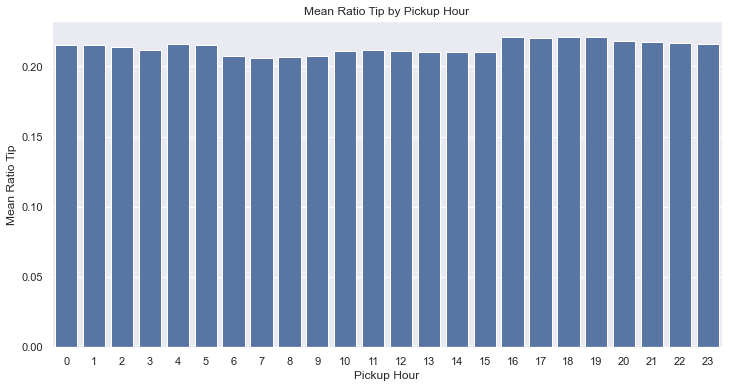

In [14]:
# Group by 'pickup_hour' and calculate the mean of 'ratio_tip'
grouped = train_data04.groupby('pickup_hour')['ratio_tip'].mean()

# Plotting the mean of 'ratio_tip' for each 'pickup_hour'
plt.figure(figsize=(12, 6))  # Create a figure with a specific size
sns.barplot(x=grouped.index, y=grouped.values)  # Use Seaborn bar plot

plt.title("Mean Ratio Tip by Pickup Hour")  # Add title
plt.xlabel("Pickup Hour")  # Label the x-axis
plt.ylabel("Mean Ratio Tip")  # Label the y-axis

plt.show()  # Show the plot

In [15]:
grouped = train_data04.groupby('pickup_hour')['ratio_tip'].mean()

# Print the daily mean of 'ratio_tip' by 'pickup_hour'
print("Mean Ratio Tip by Pickup Hour:")
print(grouped)


Mean Ratio Tip by Pickup Hour:
pickup_hour
0     0.215515
1     0.215082
2     0.213913
3     0.211721
4     0.216142
5     0.215204
6     0.207388
7     0.205793
8     0.206838
9     0.207707
10    0.211293
11    0.211513
12    0.210793
13    0.210644
14    0.210242
15    0.210499
16    0.220938
17    0.220385
18    0.221205
19    0.220826
20    0.218071
21    0.217528
22    0.216824
23    0.215729
Name: ratio_tip, dtype: float64


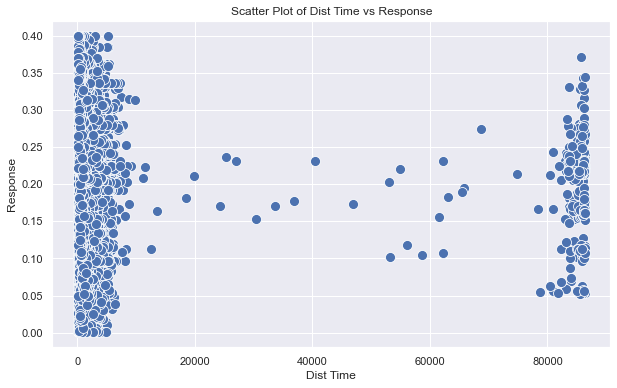

In [16]:
plt.figure(figsize=(10, 6))  # Create a figure with a specific size
sns.scatterplot(x='length_time', y='ratio_tip', data=train_data04, marker='o', s=100, color='b')

plt.title("Scatter Plot of Dist Time vs Response")  # Add a title to the plot
plt.xlabel("Dist Time")  # Label for the x-axis
plt.ylabel("Response")  # Label for the y-axis

plt.show()  # Display the plot

In [17]:
train_data04[train_data04["length_time"]>80000].shape

(310, 25)

In [18]:
train_data04.describe()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,dropoff_BoroCode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,ratio_dist,ratio_time,ratio_tip,dist_time
count,334216.0,334216.000000,334216.000000,334216.0,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000,334216.000000
mean,1.0,2.726301,13.629009,5.0,19.897357,136.328060,3.921518,977.649356,1.191966,1.264718,-73.975205,40.751145,-73.974203,40.751388,1.526501,1.643309,2.993428,13.124955,5.754825,0.015791,0.214218,0.003200
std,0.0,2.159687,6.453162,0.0,1.277513,8.661974,1.976855,2696.154782,0.707674,0.774967,0.034584,0.026348,0.031662,0.031143,0.499298,1.295701,3.234238,9.522614,4.191102,0.004161,0.062098,0.001595
min,1.0,0.010000,0.000000,5.0,18.000000,122.000000,1.000000,100.000000,1.000000,1.000000,-74.093193,40.577820,-74.202225,40.544903,1.000000,0.000000,0.010000,3.300000,2.750225,0.000047,0.000192,0.000004
25%,1.0,1.450000,9.000000,5.0,19.000000,129.000000,2.000000,440.000000,1.000000,1.000000,-73.992508,40.736725,-73.991615,40.734818,1.000000,1.000000,1.100000,7.000000,4.166667,0.012834,0.195556,0.002111
50%,1.0,2.000000,14.000000,5.0,20.000000,136.000000,4.000000,718.000000,1.000000,1.000000,-73.982048,40.753159,-73.979988,40.753731,2.000000,1.000000,1.840000,10.000000,5.263158,0.014905,0.220000,0.002883
75%,1.0,3.090000,19.000000,5.0,21.000000,144.000000,6.000000,1147.250000,1.000000,1.000000,-73.968079,40.768723,-73.963676,40.770077,2.000000,2.000000,3.360000,15.500000,6.666667,0.017738,0.242857,0.003893
max,1.0,47.600000,23.000000,5.0,22.000000,152.000000,7.000000,86393.000000,5.000000,5.000000,-73.732742,40.901421,-73.706978,40.910614,2.000000,6.000000,50.820000,159.000000,1350.000000,0.035000,0.400000,0.012693


In [18]:
train_data04=train_data04[train_data04["response"]<=8]
train_data04=train_data04[train_data04["response"]>=1]

In [38]:
raw_data = raw_data_unfiltered[(raw_data_unfiltered[['length_time', 'trip_distance', 'fare_amount','passenger_count']] != 0).all(axis=1)]
train_data04 = raw_data

In [77]:
train_data04.head()

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(train_data04[['length_time', 'trip_distance', 'fare_amount']])
X_test_normalized = scaler.transform(test_data[['length_time', 'trip_distance', 'fare_amount']])
# Integrate the normalized data back into the original dataframes
X_train_full = train_data04[['length_time', 'trip_distance', 'fare_amount', "passenger_count"]]
X_test_full = test_data[['length_time', 'trip_distance', 'fare_amount', "passenger_count"]]

X_train_full[['length_time', 'trip_distance', 'fare_amount']] = X_train_normalized
X_test_full[['length_time', 'trip_distance', 'fare_amount']] = X_test_normalized

C:\Users\anili\AppData\Local\Temp\ipykernel_9472\3678925065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_full[['length_time', 'trip_distance', 'fare_amount']] = X_train_normalized
C:\Users\anili\AppData\Local\Temp\ipykernel_9472\3678925065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_full[['length_time', 'trip_distance', 'fare_amount']] = X_test_normalized


In [19]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error

# X_test_full = test_data[['length_time', 'trip_distance', 'fare_amount', 'passenger_count',
#                     'dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday',
#                     'pickup_hour','vendor_id']]
# X_train_full = train_data04[['length_time', 'trip_distance', 'fare_amount', 'passenger_count',
#                         'dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday',
#                         'pickup_hour','vendor_id']]
# y_train_full = train_data04[['response']]

# X_train, X_test, y_train, y_test = train_test_split(train_data04[['length_time', 'trip_distance', 'fare_amount', 'passenger_count',
#                         'dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday',
#                         'pickup_hour','vendor_id']],train_data04[['response']], test_size=0.1,random_state=42)

# df = shuffle(train_data04, random_state=42)
# df_subset = df.iloc[:33000]

# # Separate features and target
# X_train_30k = df_subset[['length_time', 'trip_distance', 'fare_amount', 'passenger_count',
#                     'dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday',
#                     'pickup_hour','vendor_id']].iloc[:30000]
# y_train_30k = df_subset['response'].iloc[:30000]

# X_test_30k = df_subset[['length_time', 'trip_distance', 'fare_amount', 'passenger_count',
#                     'dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday',
#                     'pickup_hour','vendor_id']].iloc[-3000:]
# y_test_30k = df_subset['response'].iloc[-3000:]

# # Separate numerical and categorical features
# numerical_features = ['length_time', 'trip_distance', 'fare_amount']
# categorical_features = ['dropoff_BoroCode','pickup_BoroCode','pickup_doy','pickup_wday','pickup_hour','vendor_id','passenger_count']

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[numerical_features])
# X_test_scaled = scaler.transform(X_test[numerical_features])

# # Combine scaled numerical data with categorical data
# X_train_combined = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_features), X_train[categorical_features].reset_index(drop=True)], axis=1)
# X_test_combined = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_features), X_test[categorical_features].reset_index(drop=True)], axis=1)

# scaler = StandardScaler()
# X_train_scaled_30k = scaler.fit_transform(X_train_30k[numerical_features])
# X_test_scaled_30k = scaler.transform(X_test_30k[numerical_features])

# # Combine scaled numerical data with categorical data
# X_train_combined_30k = pd.concat([pd.DataFrame(X_train_scaled_30k, columns=numerical_features), X_train_30k[categorical_features].reset_index(drop=True)], axis=1)
# X_test_combined_30k = pd.concat([pd.DataFrame(X_test_scaled_30k, columns=numerical_features), X_test_30k[categorical_features].reset_index(drop=True)], axis=1)

# scaler = StandardScaler()
# X_train_scaled_full = scaler.fit_transform(X_train_full[numerical_features])
# X_test_scaled_full = scaler.transform(X_test_full[numerical_features])

# # Combine scaled numerical data with categorical data
# X_train_combined_full = pd.concat([pd.DataFrame(X_train_scaled_full, columns=numerical_features), X_train_full[categorical_features].reset_index(drop=True)], axis=1)
# X_test_combined_full = pd.concat([pd.DataFrame(X_test_scaled_full, columns=numerical_features), X_test_full[categorical_features].reset_index(drop=True)], axis=1)

In [84]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

X_test_full = test_data[['length_time', 'trip_distance', 'fare_amount',
                        'dropoff_BoroCode','pickup_doy','pickup_wday',
                        'pickup_hour', "passenger_count"]]
X_train_full = train_data04[['length_time', 'trip_distance', 'fare_amount',
                            'dropoff_BoroCode','pickup_doy','pickup_wday',
                            'pickup_hour',"passenger_count"]]
y_train_full = train_data04[['response']]

X_train, X_test, y_train, y_test = train_test_split(train_data04[['length_time', 'trip_distance', 'fare_amount',
                            'dropoff_BoroCode','pickup_doy','pickup_wday',
                            'pickup_hour']],train_data04[['response']], test_size=0.1,random_state=42)

df = shuffle(train_data04, random_state=42)
df_subset = df.iloc[:33000]

# Separate features and target
X_train_30k = df_subset[['length_time', 'trip_distance', 'fare_amount',
                        'dropoff_BoroCode','pickup_doy','pickup_wday',
                        'pickup_hour']].iloc[:30000]
y_train_30k = df_subset['response'].iloc[:30000]

X_test_30k = df_subset[['length_time', 'trip_distance', 'fare_amount',
                        'dropoff_BoroCode','pickup_doy','pickup_wday',
                        'pickup_hour']].iloc[-3000:]
y_test_30k = df_subset['response'].iloc[-3000:]

# Separate numerical and categorical features
numerical_features = ['length_time', 'trip_distance', 'fare_amount']
categorical_features = ['dropoff_BoroCode','pickup_doy','pickup_wday','pickup_hour']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Combine scaled numerical data with categorical data
X_train_combined = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_features), X_train[categorical_features].reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_features), X_test[categorical_features].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_train_scaled_30k = scaler.fit_transform(X_train_30k[numerical_features])
X_test_scaled_30k = scaler.transform(X_test_30k[numerical_features])

# Combine scaled numerical data with categorical data
X_train_combined_30k = pd.concat([pd.DataFrame(X_train_scaled_30k, columns=numerical_features), X_train_30k[categorical_features].reset_index(drop=True)], axis=1)
X_test_combined_30k = pd.concat([pd.DataFrame(X_test_scaled_30k, columns=numerical_features), X_test_30k[categorical_features].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_train_scaled_full = scaler.fit_transform(X_train_full[numerical_features])
X_test_scaled_full = scaler.transform(X_test_full[numerical_features])

# Combine scaled numerical data with categorical data
X_train_combined_full = pd.concat([pd.DataFrame(X_train_scaled_full, columns=numerical_features), X_train_full[categorical_features].reset_index(drop=True)], axis=1)
X_test_combined_full = pd.concat([pd.DataFrame(X_test_scaled_full, columns=numerical_features), X_test_full[categorical_features].reset_index(drop=True)], axis=1)

In [45]:
# Separate numerical and categorical features
numerical_features = ['length_time', 'trip_distance', 'fare_amount']
categorical_features = ['dropoff_BoroCode','pickup_doy','pickup_wday','pickup_hour']

X_train_scaled = X_train
X_test_scaled = X_test

X_train_scaled_30k = X_train_30k
X_test_scaled_30k = X_test_30k

X_train_scaled_full = X_train_full
X_test_scaled_full = X_test_full


for feature in numerical_features:
    X_train_scaled[feature] = np.log1p(X_train_scaled[feature])
    X_test_scaled[feature] = np.log1p(X_test_scaled[feature])

    X_train_scaled_30k[feature] = np.log1p(X_train_scaled_30k[feature])
    X_test_scaled_30k[feature] = np.log1p(X_test_scaled_30k[feature])

    X_train_scaled_full[feature] = np.log1p(X_train_scaled_full[feature])
    X_test_scaled_full[feature] = np.log1p(X_test_scaled_full[feature])

X_train_scaled.reset_index(inplace=True,drop=True)
X_test_scaled.reset_index(inplace=True,drop=True)

X_train_scaled_30k.reset_index(inplace=True,drop=True)
X_test_scaled_30k.reset_index(inplace=True,drop=True)

X_train_scaled_full.reset_index(inplace=True,drop=True)
X_test_scaled_full.reset_index(inplace=True,drop=True)


X_train_combined = X_train_scaled
X_test_combined = X_test_scaled

X_train_combined_30k = X_train_scaled_30k
X_test_combined_30k = X_test_scaled_30k

X_train_combined_full = X_train_scaled_full
X_test_combined_full = X_test_scaled_full


C:\Users\anili\AppData\Local\Temp\ipykernel_45764\3045468621.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_scaled_full[feature] = np.log1p(X_train_scaled_full[feature])
C:\Users\anili\AppData\Local\Temp\ipykernel_45764\3045468621.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_scaled_full[feature] = np.log1p(X_test_scaled_full[feature])


In [47]:
xgb = XGBRegressor(objective='reg:squarederror', seed=42)

# Define a smaller hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'max_depth': np.arange(3, 6),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': np.arange(100, 301, 50),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(xgb, param_distributions, n_iter=50, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

# Fit the Randomized Search model
random_search.fit(X_train_combined_30k[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']], y_train_30k)

# Best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
y_pred_xg_30k = random_search.predict(X_test_combined_30k[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']])
mae = mean_absolute_error(y_test_30k, y_pred_xg_30k)
print("Mean Absolute Error on Test Set:", mae)

Best Parameters: {'subsample': 1.0, 'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.042222222222222223, 'gamma': 0.2, 'colsample_bytree': 0.9}
Mean Absolute Error on Test Set: 0.5035738169829052


In [49]:
xgb = XGBRegressor(objective='reg:squarederror', seed=42, **best_params)

xgb.fit(X_train_combined[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']], y_train)

# Predict on the test set
y_pred = xgb.predict(X_test_combined[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']])
mae_xgb = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae_xgb)



Mean Absolute Error on Test Set: 0.4910785667861299


In [132]:
# xgb = XGBRegressor(objective='reg:squarederror', seed=42, **best_params)

# xgb.fit(X_train_combined_full, y_train_full)

# # Predict on the test set
# y_pred_final = xgb.predict(X_test_combined_full)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# X_train_30k_encoded = X_train_combined_30k.copy()

# label_cats = ['dropoff_BoroCode', 'pickup_BoroCode']
# for feature in label_cats:
#     X_train_30k_encoded[feature] = label_encoder.fit_transform(X_train_combined_30k[feature])

# X_test_30k_encoded = X_test_combined_30k.copy()
# for feature in label_cats:
#     X_test_30k_encoded[feature] = label_encoder.transform(X_train_combined_30k[feature]) 

param_distributions = {
    'n_estimators': [50, 100, 200, 500],  # Options for estimators
    'max_depth': [None, 10, 20, 30],      # Depth of trees
    'min_samples_split': [2, 4, 8],       # Samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Features to consider at each split
}

# Initialize the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled; adjust to manage computation time
    cv=5,       # 3-fold cross-validation
    verbose=0,  # You can set it to 0 to reduce console output
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit the model on the training data
random_search_rf.fit(X_train_combined_30k[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']], y_train_30k)

# Best parameters and best model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_
print("Best Parameters:", best_params_rf)

y_pred_rf = random_search_rf.predict(X_test_combined_30k[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']])
mae_rf2 = mean_absolute_error(y_test_30k, y_pred_rf)
print("Mean Absolute Error on Test Set:", mae_rf2)

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

Best Parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Mean Absolute Error on Test Set: 0.5045321675642337


In [51]:
rfmodel = RandomForestRegressor(random_state=42, **best_params_rf)

rfmodel.fit(X_train_combined[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']], y_train)

y_pred_rf=rfmodel.predict(X_test_combined[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']])
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error on Test Set:", mae_rf)

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error on Test Set: 0.49098316799106556


In [52]:
# import lightgbm as lgb

# lgbm = lgb.LGBMRegressor(seed=42)

# # Define a smaller hyperparameter grid for RandomizedSearchCV
# param_distributions = {
#     'num_leaves': np.arange(20, 50),
#     'learning_rate': [0.01,0.02,0.05,0.1,0.2],
#     'n_estimators': np.arange(100, 301, 50),
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'min_child_weight': [1, 3, 5],
#     'boosting_type': ['gbdt', 'dart']
# }

# # Randomized Search with Cross-Validation
# random_search = RandomizedSearchCV(
#     lgbm,
#     param_distributions,
#     n_iter=50,
#     cv=3,
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the Randomized Search model
# random_search.fit(X_train_combined_30k[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']], y_train_30k)

# # Best parameters and best model
# best_params_gbm = random_search.best_params_
# best_model_gbm = random_search.best_estimator_

# print("Best Parameters:", best_params_gbm)

# # Test set prediction and evaluation
# y_pred_lgb_30k = random_search.predict(X_test_30k[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']])
# mae_gbm2 = mean_absolute_error(y_test_30k, y_pred_lgb_30k)

# print("Mean Absolute Error on Test Set:", mae_gbm2)


In [53]:
# lgbm = lgb.LGBMRegressor(random_state=42, **best_params_gbm)

# lgbm.fit(X_train_combined[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']], y_train)

# y_pred_gbm=lgbm.predict(X_test_combined[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']])
# mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
# print("Mean Absolute Error on Test Set:", mae_gbm)

In [54]:
# from sklearn.linear_model import Ridge

# # Define the Ridge regression model
# ridge = Ridge(random_state=42)

# # Define a simple parameter grid for alpha (regularization strength)
# param_distributions = {
#     'alpha': np.linspace(0.01, 10, 100),  # Regularization strength
# }

# # Randomized Search with Cross-Validation
# random_search = RandomizedSearchCV(
#     ridge,
#     param_distributions,
#     n_iter=30,
#     cv=5,
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the Randomized Search model
# random_search.fit(X_train_combined_30k[["length_time","fare_amount","trip_distance"]], y_train_30k)

# # Best parameters and best model
# best_params_ridge = random_search.best_params_
# best_model_ridge = random_search.best_estimator_

# print("Best Parameters:", best_params_ridge)

# # Test set prediction and evaluation
# y_pred_ridge_30k = random_search.predict(X_test_30k[["length_time","fare_amount","trip_distance"]])
# mae_ridge2 = mean_absolute_error(y_test_30k, y_pred_ridge_30k)

# print("Mean Absolute Error on Test Set:", mae_ridge2)


In [55]:
# ridge = Ridge(random_state=42, **best_params_ridge)

# ridge.fit(X_train_combined, y_train)

# y_pred_ridge=ridge.predict(X_test_combined)
# mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
# print("Mean Absolute Error on Test Set:", mae_ridge)

In [56]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

linear.fit(X_train_combined[['trip_distance', 'fare_amount','length_time']], y_train)

y_pred_linear=linear.predict(X_test_combined[['trip_distance', 'fare_amount','length_time']])
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error on Test Set:", mae_linear)

Mean Absolute Error on Test Set: 0.5752750125128969


In [57]:
# if y_pred_ridge.ndim == 2 and y_pred_ridge.shape[1] == 1:
#     y_pred_ridge = y_pred_ridge.ravel()

# total_inverse_mae = (1/mae_xgb) + (1/mae_rf) + (1/mae_gbm) +(1/mae_ridge)
# weight1 = (1/mae_xgb) / total_inverse_mae
# weight2 = (1/mae_rf) / total_inverse_mae
# weight3 = (1/mae_gbm) / total_inverse_mae
# weight4 = (1/mae_ridge) / total_inverse_mae

# weighted_preds = (y_pred * weight1) + (y_pred_rf * weight2) + (y_pred_gbm * weight3) + (y_pred_ridge * weight4)
 

# ensemble_mae = mean_absolute_error(y_test, weighted_preds)
# print("Ensemble MAE:", ensemble_mae)
# print("Weights: xgboost -", weight1, ", Random Forest -", weight2,", LightGBM - ", weight3, ", Ridge-",weight4)

In [58]:
if y_pred_linear.ndim == 2 and y_pred_linear.shape[1] == 1:
    y_pred_linear = y_pred_linear.ravel()

total_inverse_mae = (1/mae_xgb) + (1/mae_rf) + (1/mae_linear)
weight1 = (1/mae_xgb) / total_inverse_mae
weight2 = (1/mae_rf) / total_inverse_mae
weight3 = (1/mae_linear) / total_inverse_mae

weighted_preds = (y_pred * weight1) + (y_pred_rf * weight2) + (y_pred_linear * weight3)
 

ensemble_mae = mean_absolute_error(y_test, weighted_preds)
print("Ensemble MAE:", ensemble_mae)
print("Weights: xgboost -", weight1, ", Random Forest -", weight2,", Linear - ", weight3)

Ensemble MAE: 0.49357740209314216
Weights: xgboost - 0.35040559609806987 , Random Forest - 0.3504736804517318 , Linear -  0.29912072345019836


In [59]:
xgb.fit(X_train_combined_full[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']], y_train_full)
y_pred_final = xgb.predict(X_test_combined_full[['trip_distance', 'fare_amount','pickup_doy','pickup_wday','pickup_hour']])


rfmodel.fit(X_train_combined_full[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']], y_train_full)
y_pred_rf_final=rfmodel.predict(X_test_combined_full[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode']])


# lgbm.fit(X_train_combined_full[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']], y_train_full)
# y_pred_gbm_final=lgbm.predict(X_test_combined_full[['length_time', 'trip_distance', 'fare_amount','dropoff_BoroCode','pickup_doy','pickup_hour']])


# ridge.fit(X_train_combined_full[["length_time","fare_amount","trip_distance"]], y_train_full)
# y_pred_ridge_final=ridge.predict(X_test_combined_full[["length_time","fare_amount","trip_distance"]])

linear.fit(X_train_combined_full[['trip_distance', 'fare_amount','length_time']], y_train_full)
y_pred_linear_final=linear.predict(X_test_combined_full[['trip_distance', 'fare_amount','length_time']])

C:\Users\anili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [60]:
if y_pred_linear_final.ndim == 2 and y_pred_linear_final.shape[1] == 1:
    y_pred_linear_final = y_pred_linear_final.ravel()

weighted_preds_final = (y_pred_final * weight1) + (y_pred_rf_final * weight2) + (y_pred_linear_final * weight3)

In [61]:
export_pred = pd.DataFrame(weighted_preds_final, columns = ['response'])
export_pred.to_csv('istanbulls_res4.txt', index = False, header = False)

In [ ]:
# grouped2 = train_data04.groupby(['pickup_doy', 'pickup_hour',"dropoff_BoroCode"])['ratio_tip'].mean()
# grouped3 = train_data04.groupby(['pickup_doy', 'pickup_hour'])['ratio_tip'].mean()
# X_test2 = test_data
# try:
#     X_test2['new_x'] = X_test2.apply(
#         lambda row: row['fare_amount'] * grouped2[(row['pickup_doy'], row['pickup_hour'], row["dropoff_BoroCode"])], 
#         axis=1
#     )
# except KeyError:
#     # If 'grouped2' does not contain the key, fall back to 'grouped3'
#     X_test2['new_x'] = X_test2.apply(
#         lambda row: row['fare_amount'] * grouped3[(row['pickup_doy'], row['pickup_hour'])], 
#         axis=1
#     )


# print("X_test with 'new_x' column:")
# X_test2.head()

# new_x_array = X_test2['new_x'].to_numpy()
# export_pred = pd.DataFrame(new_x_array, columns = ['response'])
# export_pred.to_csv('istanbullsother2.txt', index = False, header = False)

In [ ]:
# second_index_139 = grouped2.loc[(grouped2.index.get_level_values(0) == 139)&(grouped2.index.get_level_values(1) == 15)]
# second_index_139

In [65]:
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming `X_test_combined_full` is a DataFrame with test features
# Standardize if needed
scaler = StandardScaler()
X_test_combined_full_scaled = scaler.fit_transform(X_test_combined_full)

# Define a PyTorch dataset and dataloader for `X_test_combined_full`
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, features):
        self.features = torch.tensor(features, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# Create DataLoader for the test set
test_dataset = CustomDataset(X_test_combined_full_scaled)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Make predictions using the trained model
model.eval()  # Set the model to evaluation mode

predictions = []

with torch.no_grad():
    for batch_features in test_loader:
        outputs = model(batch_features)  # Forward pass
        predictions.extend(outputs.view(-1).tolist())  # Collect predictions

# Convert predictions to a DataFrame and save to a file
export_pred = pd.DataFrame(predictions, columns=['response'])

# Save to a text file without header or index
export_pred.to_csv('predictions31.txt', index=False, header=False)

print("Predictions have been saved to 'predictions.txt'")


Predictions have been saved to 'predictions.txt'


In [66]:
export_pred.shape

(147546, 1)

In [40]:
X_train_full

,length_time,trip_distance,fare_amount,dropoff_BoroCode,pickup_doy,pickup_wday,pickup_hour
0,520,0.90,7.0,1,132,4,18
1,824,1.40,10.0,1,127,6,18
2,1016,1.14,11.5,1,132,4,7
3,550,1.28,7.5,1,134,6,11
4,501,1.40,7.5,1,128,7,20
...,...,...,...,...,...,...,...
343741,740,5.84,18.5,1,145,3,20
343742,193,0.70,4.5,1,141,6,23
343743,764,1.70,10.0,1,132,4,19
343744,955,2.20,12.0,1,140,5,21


In [88]:
X_train_full.head()

,length_time,trip_distance,fare_amount,dropoff_BoroCode,pickup_doy,pickup_wday,pickup_hour,passenger_count
0,520,0.90,7.0,1,132,4,18,1
1,824,1.40,10.0,1,127,6,18,1
2,1016,1.14,11.5,1,132,4,7,1
3,550,1.28,7.5,1,134,6,11,1
4,501,1.40,7.5,1,128,7,20,1


In [91]:
import tensorflow as tf
from keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

# Assuming taxi_final_train and taxi_final_test are already loaded into dataframes
# Separate features and target
#feature_columns = ["pickup_hour", "length_time", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "trip_distance"]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Create the neural network
model = Sequential()

# Input layer with 100 neurons
model.add(Dense(300, activation='relu', input_shape=(X_train_full.shape[1],)))

# Output layer for regression
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model
model.fit(X_train_scaled, y_train_full, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
8579/8579 [==============================] - 13s 1ms/step - loss: 0.6105 - val_loss: 0.5873
Epoch 2/15
8579/8579 [==============================] - 12s 1ms/step - loss: 0.5879 - val_loss: 0.5890
Epoch 3/15
8579/8579 [==============================] - 12s 1ms/step - loss: 0.5845 - val_loss: 0.5875
Epoch 4/15
8579/8579 [==============================] - 11s 1ms/step - loss: 0.5828 - val_loss: 0.5842
Epoch 5/15
8579/8579 [==============================] - 12s 1ms/step - loss: 0.5804 - val_loss: 0.5803
Epoch 6/15
8579/8579 [==============================] - 11s 1ms/step - loss: 0.5802 - val_loss: 0.5816
Epoch 7/15
8579/8579 [==============================] - 12s 1ms/step - loss: 0.5783 - val_loss: 0.5806
Epoch 8/15
8579/8579 [==============================] - 12s 1ms/step - loss: 0.5790 - val_loss: 0.5769
Epoch 9/15
8579/8579 [==============================] - 11s 1ms/step - loss: 0.5768 - val_loss: 0.5751
Epoch 10/15
8579/8579 [==============================] - 12s 1ms/step - l

In [93]:
X_pred_scaled = scaler.transform(X_test_full)

# Make predictions
y_pred = model.predict(X_pred_scaled)

# Save predictions to file
#np.savetxt("predictions_v31.txt", y_pred, delimiter="\n")

4611/4611 [==============================] - 4s 898us/step


In [94]:
import pandas as pd

# Assume `y_pred` contains the predictions from your model
# Convert to a Pandas DataFrame with a single column named 'response'
export_pred = pd.DataFrame(y_pred, columns=['response'])

# Save to a CSV file without including index or header
export_pred.to_csv('istanbulls_subbb188.txt', index=False, header=False)

print("Predictions have been saved to 'istanbulls_res4.txt'")


Predictions have been saved to 'istanbulls_res4.txt'


In [46]:
export_pred.shape

(147546, 1)